In [3]:
import pandas as pd
import  re

# 파일 경로
path = "nsmc_train.csv"

# 인코딩
try : 
    df = pd.read_csv(path, encoding = "utf-8")
except:
    df = pd.read_csv(path, encoding = "cp949")
    


In [4]:
# 텍스트 정제
text_col = "review"

# 텍스트 정제 함수
def clean_text(s):
    s = str(s).lower()
    s = re.sub("[^ㄱ-ㅎ가-힣a-z0-9 ]", " ", s)
    return re.sub(r"\s+", " ", s).strip()

df = df.dropna(subset=[text_col]).copy()
df['cleaned'] = df[text_col].apply(clean_text)
df

,id,review,rating,cleaned
0,9324809,배우들의 인생연기가 돋보였던... 최고의 드라마,1,배우들의 인생연기가 돋보였던 최고의 드라마
1,9305425,아 혜리 보고싶다 ... 여군좀 ㅠ,0,아 혜리 보고싶다 여군좀
2,5239110,"눈이 팅팅..... 정말 ,..... 대박이다......",1,눈이 팅팅 정말 대박이다
3,9148159,캐슬린 터너의 보디는 볼만했다,0,캐슬린 터너의 보디는 볼만했다
4,6144938,진짜 최고였다.,1,진짜 최고였다
...,...,...,...,...
149988,8507630,개소리지꺼리지마 변태년들아,0,개소리지꺼리지마 변태년들아
149989,7960767,지루하고 짜증나고 어지럽고 싱겁고...재수가 없고 불쾌한 영화..영화라고 부르기도 ...,0,지루하고 짜증나고 어지럽고 싱겁고 재수가 없고 불쾌한 영화 영화라고 부르기도 민망함
149990,8849726,스크림같은 반전영화를 만들고 싶었나본데 택도 없음-_-,0,스크림같은 반전영화를 만들고 싶었나본데 택도 없음
149991,4239351,제작비 탓만 하기에는 너무 빈약한 각본. 원작을 못살린 채 이유없이 연결되는 플롯.,0,제작비 탓만 하기에는 너무 빈약한 각본 원작을 못살린 채 이유없이 연결되는 플롯


In [5]:
# count_Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 1. 벡터라이저 생성 / 상위 1000개, 최소단위 5
cv = CountVectorizer(max_features=1000, min_df=5)

# 2. countvectorizer 적용
x_cnt = cv.fit_transform(df['cleaned'])
vocab = cv.get_feature_names_out()

In [6]:
print(vocab)

['0점' '0점은' '10' '10점' '1점' '1점도' '2점' '3류' '3점' '4점' '80년대' '8점' '90년대'
 '9점' 'b급' 'cg' 'good' 'oo' 'ooo' 'ooo기' 'ost' 'the' 'tv' 'ㄷㄷ' 'ㅅㅂ' 'ㅇㅇ'
 'ㅉㅉ' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅋㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ' '가끔' '가는' '가볍게' '가서' '가슴' '가슴이'
 '가장' '가족' '가지고' '가진' '각본' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이' '감동'
 '감동과' '감동도' '감동을' '감동이' '감동적이고' '감동적인' '감사합니다' '감정을' '갑자기' '강추' '같네요'
 '같다' '같습니다' '같아' '같아서' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개인적으로' '거의' '건지'
 '걸작' '겁나' '것도' '것은' '것을' '것이' '것이다' '게다가' '결국' '결말' '결말도' '결말은' '결말이'
 '계속' '공감' '공감이' '공포' '공포영화' '과연' '괜찮은' '괜히' '굉장히' '구성' '굳이' '굿굿' '귀여운'
 '귀엽고' '그걸' '그게' '그나마' '그냥' '그다지' '그닥' '그대로' '그들의' '그때' '그래' '그래도' '그래서'
 '그러나' '그럭저럭' '그런' '그런가' '그런데' '그런지' '그럼' '그렇게' '그렇고' '그렇다' '그렇다고' '그리'
 '그리고' '그만' '그의' '그저' '극장에서' '극장판' '근데' '글쎄' '기대' '기대를' '기대하고' '기대했는데'
 '기분' '기분이' '기억' '기억에' '기억이' '긴장감' '긴장감도' '깊은' '까지' '꿀잼' '끝까지' '끝나고' '나는'
 '나도' '나를' '나름' '나만' '나서' '나에게' '나오고' '나오는' '나온' '나온다' '나옴' '나와서' '나왔으면'
 '나의' '나중에' '난다' '남는' '남는다' '남자' '남자가' '남자의' '낫다' '낮아서

In [7]:
# 3. 단어별 전체 빈도 계산
# freq 단어별로 몇개의 값이 있는지 파악
# axis=0 열에 대한 계산
# .A1 2차원 배열을 1차원으로 변경하는 구문


freq = x_cnt.sum(axis=0).A1
print(freq)

[  165   118   144  1015   711   522   161   203   148   130   157   115
   145   150   263   124   342   238   192   140   132   157   187   182
   158   116   311  2498  1370   561   184  1053   251   139   175   127
   162   276   415  1151   115   244   139   143   365   409   797   193
   271   635   655   810   148   355   331   264   173   317   188   116
   285   481   190   901   185   117   116   342   987   311   166   407
   156   532   314   142   226   124   362   269   397   435   241   155
   460   309   141   131   353   697   113   152   218   216   169   414
   193   328   156   174   113   156   160   123   239   416  3511   146
   223   271   168   132   141   930   456   333   148   511   162   204
   290   139   459   190   115   139   147  1783   227   216   506   460
   130   849   128   312   164   210   114   291   153   118   451   355
   291   124   177   137   163  1007   137   684   587   183   606   165
   125   152   155   660   372   159   121   310   

In [8]:
# argsort()[::-1] 역순정렬로 집계 desc [::20]상위 20개

top_idx = np.argsort(freq)[::-1][:20]
print(top_idx)

[636 184 838 904 106 710 647 359 641  27 637 398 922 176 704 244 598 596
 702 716]


## **argsrot** 
- 자주쓰이는 함수

In [9]:
# [단어(어휘), 빈도수] 
top_terms = [[vocab[i], int(freq[i])] for i in top_idx]
print(top_terms)

[['영화', 19132], ['너무', 8699], ['정말', 8479], ['진짜', 6858], ['그냥', 3511], ['이런', 3477], ['영화를', 2911], ['보고', 2667], ['영화는', 2544], ['ㅋㅋ', 2498], ['영화가', 2490], ['봤는데', 2380], ['최고의', 2315], ['내가', 2178], ['이건', 2142], ['드라마', 2066], ['없다', 2051], ['없는', 2037], ['이거', 1917], ['이렇게', 1913]]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=1000, min_df=5)
X_tfidf = tv.fit_transform(df["cleaned"].head(5000))
vocab_t = tv.get_feature_names_out()

# 단어별 평균 TF-IDF 계산(추가)
mean_tfidf = X_tfidf.mean(axis=0).A1
top_idx_t = np.argsort(mean_tfidf)[::-1][:20]
top_terms_tfidf = [(vocab_t[i], round(float(mean_tfidf[i]), 4)) for i in top_idx_t]
top_terms_tfidf

[('영화', 0.0427),
 ('너무', 0.0215),
 ('정말', 0.0203),
 ('진짜', 0.0195),
 ('그냥', 0.0125),
 ('이런', 0.0115),
 ('ㅋㅋ', 0.0103),
 ('영화를', 0.0082),
 ('최고의', 0.0081),
 ('영화는', 0.008),
 ('이건', 0.0079),
 ('보고', 0.0078),
 ('드라마', 0.0071),
 ('없는', 0.0069),
 ('내가', 0.0069),
 ('최고', 0.0066),
 ('ㅋㅋㅋ', 0.0065),
 ('다시', 0.0062),
 ('이게', 0.0061),
 ('역시', 0.006)]

In [11]:
!fc-cache -fv

'fc-cache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [12]:
# 워드클라우드
freq_dict = dict(top_terms)
print(freq_dict)

{'영화': 19132, '너무': 8699, '정말': 8479, '진짜': 6858, '그냥': 3511, '이런': 3477, '영화를': 2911, '보고': 2667, '영화는': 2544, 'ㅋㅋ': 2498, '영화가': 2490, '봤는데': 2380, '최고의': 2315, '내가': 2178, '이건': 2142, '드라마': 2066, '없다': 2051, '없는': 2037, '이거': 1917, '이렇게': 1913}


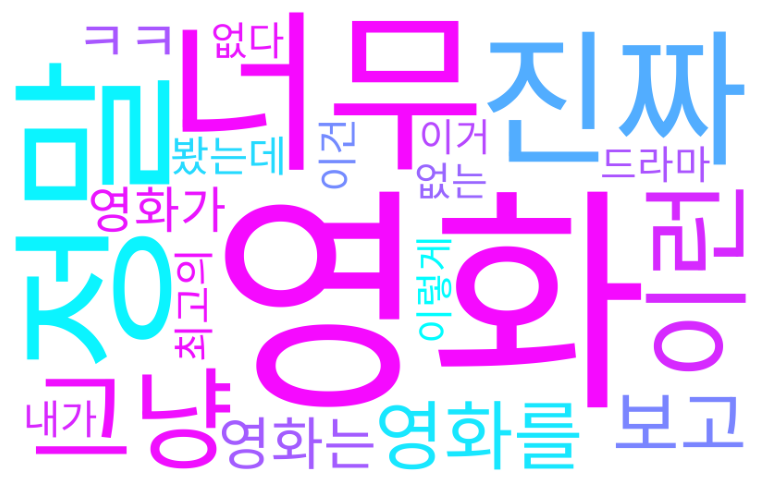

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "C:/Users//Downloads/NotoSansKR-Regular.ttf"

wc = WordCloud(font_path=font_path,
               background_color="white", width=800, height=500,
               colormap="cool")

plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_frequencies(freq_dict))
plt.axis("off")
plt.show()

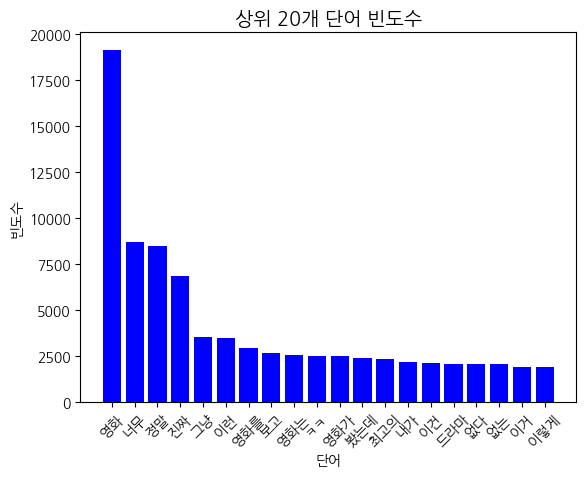

In [ ]:
import koreanize_matplotlib
from wordcloud import wordcloud
import matplotlib.pyplot as plt

df_top = pd.DataFrame(top_terms, columns=["단어", "빈도"])

plt.Figure(figsize=(10,4))
plt.bar(df_top["단어"], df_top["빈도"], color="blue")
plt.xticks(rotation=45) #45도 각도로 X축의 범례를 회전 시킨다.
plt.title("상위 20개 단어 빈도수", fontsize=14)
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.show()